#  Presentacion de la TS12
## Francisco Pereira

In [1]:
from IPython.display import IFrame
IFrame("TS-12.pdf", width=1000, height=1000)

## Ejercicio 1

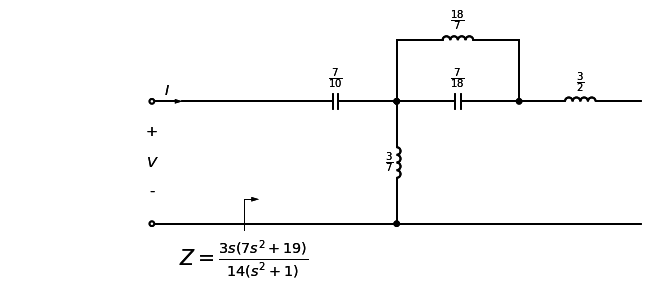

In [4]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s ', complex=True)
ZZ = (s**2+2)*(s**2+5)/(3*s**3+7*s)
    
Z2, Zc1 = tc2.remover_polo_dc(ZZ)

# Zc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

Y4, Yl1 = tc2.remover_polo_dc(1/Z2, omega_zero = 1)

# Yl1 es la impedancia removida
# extraigo L1
L1 = 1/(s*Yl1)

Z6, Z5, L2, C2 = tc2.remover_polo_jw(1/Y4, isImpedance = True)

Z8, Zl3 = tc2.remover_polo_infinito(Z6)
L3= Zl3/s

d = Drawing(unit=4)

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          1/Y4, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Capacitor, C1)

d = tc2.dibujar_elemento_derivacion(d, Inductor, L1)

d = tc2.dibujar_tanque_serie(d, L2, C2)

d = tc2.dibujar_elemento_serie(d, Inductor, L3)


display(d)

## Ejercicio 2

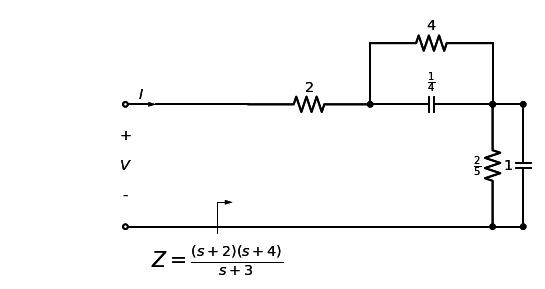

In [6]:
s = sp.symbols('s ', complex=True)
YY = (s+2)*(s+4)/(s+3)
    
Y2, Yc1 = tc2.remover_polo_infinito(YY)

# Zc1 es la admitancia removida
# extraigo C1
C1 =(Yc1)/s

Y4, YR1 = tc2.remover_valor(Y2, sigma_zero = 1)

# Yl1 es la impedancia removida
# extraigo L1
R1 = 1/(YR1)

Z6, Z5, R2, C2 = tc2.remover_polo_sigma(1/Y4, sigma = 1, isImpedance = True, isRC = True)

Z8, R3 = tc2.remover_valor_en_infinito(Z6)

d = Drawing(unit=4)

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          YY, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Resistor, R3)

d = tc2.dibujar_tanque_RC_serie(d, R2, C2)

d = tc2.dibujar_elemento_derivacion(d, Resistor, R1)

d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)


display(d)

<IPython.core.display.Math object>

TransferFunctionContinuous(
array([1., 1.]),
array([1., 6., 8.]),
dt: None
)


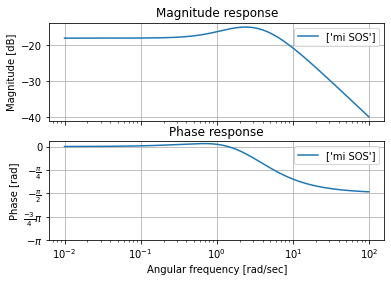

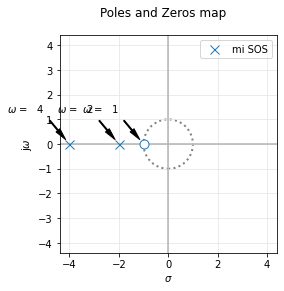

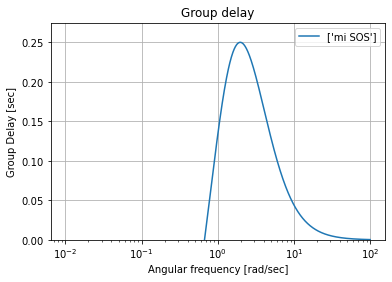

In [2]:
import matplotlib.pyplot as plt  
import numpy as np  #
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq

num = np.array([1, 1])
den = np.array([1, 6, 8])

pretty_print_bicuad_omegayq(num,den)

mi_sos = sig.TransferFunction(num,den)

print (mi_sos)
plt.close('all')
analyze_sys(mi_sos, 'mi SOS')